In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [12]:
# Reshape the input data to match the expected input shape of the autoencoder
x_test_reshaped = x_test.reshape(-1, 28, 28)

![image.png](attachment:image.png)

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Initialize the model
encode_model = Sequential()

############
# Encoding #
############

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS
# CONVOLUTIONAL LAYER
encode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
encode_model.add(MaxPool2D(pool_size=(2, 2)))

## THIRD SET OF LAYERS
# FLATTEN LAYER
encode_model.add(Flatten())
# DENSE LAYER
encode_model.add(Dense(30, activation='relu'))

# Print the summary of the model
print("Model Summary:")
encode_model.summary()

Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 30)

In [16]:
############
# Decoding #
############
decode_model=Sequential()

# DeConv1
#decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
#decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Dense(7*7*8,activation="relu"))
decode_model.add(Reshape([7,7,8]))

# DeConv2
decode_model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
# Upsampling LAYER
decode_model.add(UpSampling2D((2, 2)))

# Deconv3
decode_model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
# POOLING LAYER
decode_model.add(UpSampling2D((2, 2)))

decode_model.add(Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [20]:
from keras.models import Sequential
from keras.layers import Conv2DTranspose
# Define the decoder part of the autoencoder
decode_model = Sequential([
    Dense(7*7*8, input_shape=[30], activation='relu'),
    Dense(7*7*8, activation='relu'),
    Reshape([7, 7, 8]),
    Conv2DTranspose(filters=8, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2DTranspose(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2DTranspose(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')
])

# Construct the autoencoder model
autoencoder = Sequential([encode_model, decode_model])

# Print the summary of the autoencoder model
print("Autoencoder Summary:")
autoencoder.summary()

Autoencoder Summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 30)                13110     
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         168105    
                                                                 
Total params: 181,215
Trainable params: 181,215
Non-trainable params: 0
_________________________________________________________________


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the encoder model
encoder = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(30, activation='relu')
])

# Compile the encoder model
encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [23]:
encoder.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 30)               

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the encoder model
encode_model = Sequential([
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(30, activation='relu')
])

# Summarize the encoder model
encode_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 8)         1160      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 8)          0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 30)               

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Reshape

# Define the decoder model
decoder = Sequential([
    Dense(30, input_shape=[30], activation='relu'),
    Dense(7*7*8, activation='relu'),
    Reshape([7, 7, 8]),
    Conv2DTranspose(filters=8, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2DTranspose(filters=16, kernel_size=(3,3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),
    Conv2DTranspose(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same')
])

# Summarize the decoder model
decoder.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                930       
                                                                 
 dense_9 (Dense)             (None, 392)               12152     
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 7, 7, 8)          584       
 ranspose)                                                       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 14, 14, 16)      

In [27]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255
x_test.shape

(10000, 28, 28, 1)

In [28]:
from keras.models import Model

# Define the autoencoder model by combining the encoder and decoder
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(x=x_train, y=x_train, epochs=10, batch_size=128, shuffle=True, verbose=1, validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 25s 49ms/step - loss: 0.0482 - val_loss: 2.0213
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.0040 - val_loss: 1.8828
Epoch 3/10
469/469 [==============================] - 26s 56ms/step - loss: 0.0040 - val_loss: 1.6814
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0040 - val_loss: 1.4846
Epoch 5/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0040 - val_loss: 1.2757
Epoch 6/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0040 - val_loss: 1.1175
Epoch 7/10
469/469 [==============================] - 37s 80ms/step - loss: 0.0040 - val_loss: 1.0146
Epoch 8/10
469/469 [==============================] - 42s 89ms/step - loss: 0.0040 - val_loss: 0.9405
Epoch 9/10
469/469 [==============================] - 73s 155ms/step - loss: 0.0040 - val_loss: 0.9021
Epoch 10/10
469/469 [==============================] - 78s 167ms/step - loss: 0.0

313/313 [==============================] - 6s 18ms/step


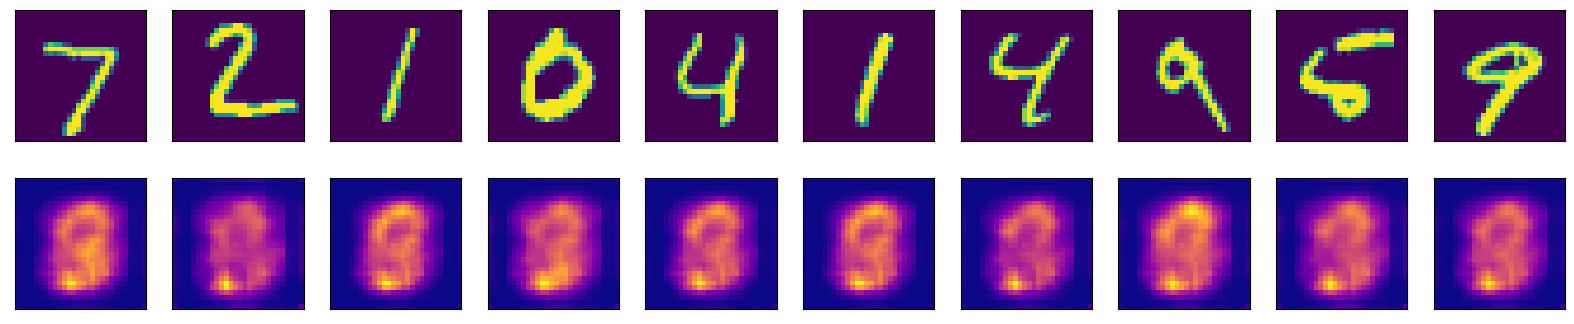

In [32]:
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(20, 4))
for i in range(n):  # Specify the number of iterations
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='viridis')  # Set cmap to 'viridis' for a different color
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='plasma')  # Set cmap to 'plasma' for a different color
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()